In [151]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/udemy-courses/udemy_courses.csv



> Massive open online course(MOOCs) have gained a lot of popularity in the past years. Websites like Udemy, coursera, Edx offer wide variety of free and paid courses, which can be opted for and be studied at one's own pace. 
This Data set is taken from udemy and describes the courses offered, their price and subscribers count, etc... 
Let's Clean this dataset and answer a few questions. 

In [152]:
df = pd.read_csv("udemy_courses.csv")

In [153]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   object
 4   price                3683 non-null   object
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
dtypes: int64(4), object(8)
memory usage: 345.4+ KB


In [155]:
df.shape

(3683, 12)

# Topics Covered: 
## I. EDA
## II.Questions:
1. Which is the most popular course on udemy?
2. what are the total Number of paid and free courses?
3. How does number of subscribers vary with price?
4. Does Price affect number of reviews?
5. Which has more number of subscribers? Paid or free?
6. Which level of course is most subscribed to? 
7. Do paid course have more number of lectures?

## III. Conclusion

# I. EDA 
## 1. Most popular subjects

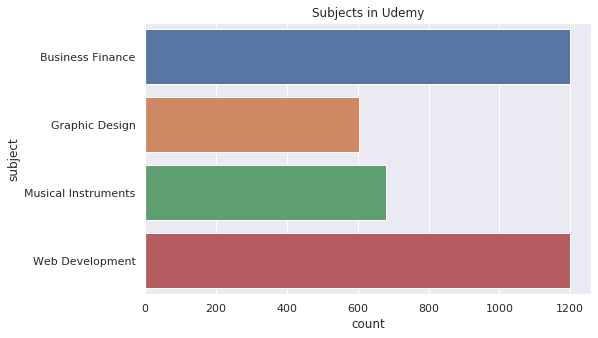

In [156]:
sns.set()
plt.figure(figsize=(8,5))
sns.countplot(y= df['subject'],data=df)
plt.title("Subjects in Udemy")
plt.show()

This Plot shows that courses related to business and technology are most popular.

## 2. Level of Courses

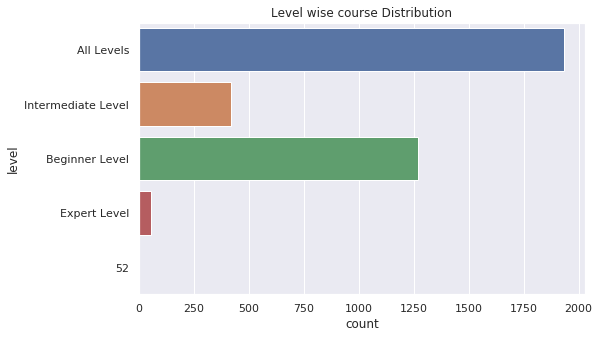

In [157]:
plt.figure(figsize=(8,5))
sns.countplot(y=df['level'], data=df)
plt.title("Level wise course Distribution")
plt.show()

Univariate analysis of 'level' variable tells that there are more number of all level and beginner level courses, which actually makes sense since only a few people will opt for expert level courses

## Que1: What is the most popular course on udemy?

In [158]:
df.loc[df.num_subscribers.idxmax()]

course_id                                                          41295
course_title                        Learn HTML5 Programming From Scratch
url                    https://www.udemy.com/learn-html5-programming-...
is_paid                                                            False
price                                                               Free
num_subscribers                                                   268923
num_reviews                                                         8629
num_lectures                                                          45
level                                                         All Levels
content_duration                                              10.5 hours
published_timestamp                                 2013-02-14T07:03:41Z
subject                                                  Web Development
Name: 2832, dtype: object

> Also, Since course_id and url will not aid is in our EDA lets drop them. 

In [159]:
df.drop(['course_id','url'], axis=1, inplace=True)

## Que2: What is the number of paid and free courses?

In [160]:
df['is_paid'].value_counts()

True                                           2738
TRUE                                            634
False                                           264
FALSE                                            46
https://www.udemy.com/learnguitartoworship/       1
Name: is_paid, dtype: int64

Ohh gosh! This is a blunder, we'll have to first **clean** the data in order to answer que2.
> **Replacing the Instance** where 'is_paid' is neither True nor False . **Note: I have checked it on udemy that the course listed here is paid. so lets replace it with True**

In [161]:
df['is_paid'] = df['is_paid'].replace('https://www.udemy.com/learnguitartoworship/',
                                      'True')

> But, 'is_paid' is considering True and TRUE as differnet categories, Therefore, **Replacing** TRUE as True & FALSE as False

In [162]:
df.replace(to_replace = 'TRUE', value = 'True', inplace = True)
df.replace(to_replace = 'FALSE', value = 'False', inplace = True)

In [163]:
df['is_paid'].value_counts()

True     3373
False     310
Name: is_paid, dtype: int64

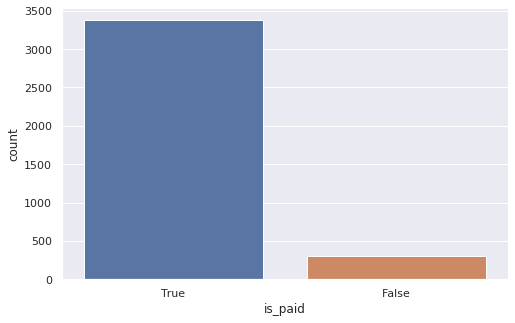

In [164]:
x = df['is_paid']
plt.figure(figsize=(8,5))
sns.countplot(x)
plt.show()

Thus, there are almost 10x more paid courses than free ones. Well, that's pretty Obvious, that's how businesses run


### Que3: How does price affect the buyer? 

Cleaning Steps:

1. Covert 'Free' to 0
2. Covert or delete 'TRUE'
3. Covert column to integer

In [167]:
df.price.value_counts()

#Step 1: Converting Free
df.price = df.price.replace('Free', 0)

#Step 2: Delete the 1 row where price is = TRUE
that_one_element = df[df.price == 'True'].index
df.drop(that_one_element, inplace = True, axis = 0)

#Step 3: Convert column to integer
df.price = pd.to_numeric(df['price'])

<Figure size 432x288 with 0 Axes>

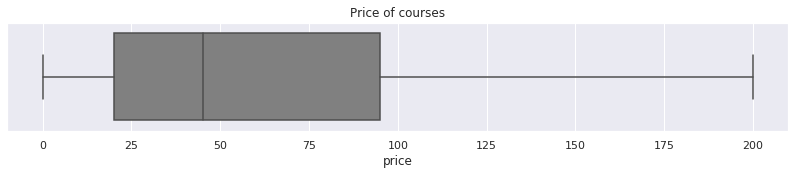

<Figure size 432x288 with 0 Axes>

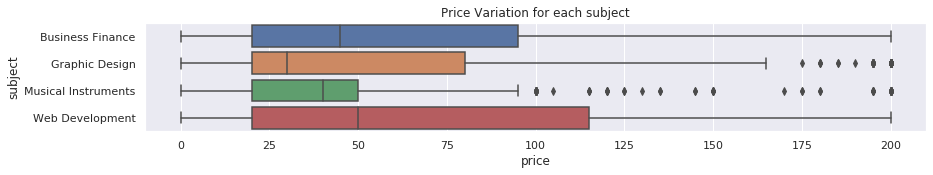

In [168]:
plt.figure()
plt.subplots(figsize=(14,2))
sns.boxplot(x=df['price'], data=df, color='gray')
plt.title("Price of courses")
plt.show()

plt.figure()
plt.subplots(figsize=(14,2))
sns.boxplot(x=df['price'], y=df['subject'])
plt.title("Price Variation for each subject")
plt.show()

This means :
* Average price of all the course combined is less than $50
* Graphic Design Course has the least average 
* Web development has highest interquartile range 
* Music Instruments has least interquartile range

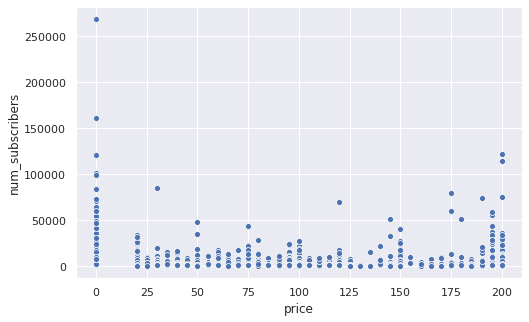

In [169]:
x = df['price']
y = df['num_subscribers']
sns.set()
plt.figure(figsize=(8,5))
sns.scatterplot(x,y)
plt.show()

Free courses have the maximum number of subscribers


## Que4: Does Price affect number of reviews?

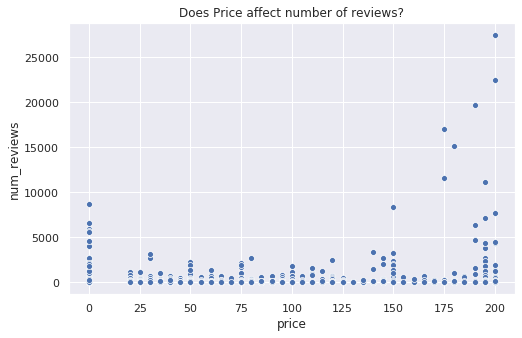

In [170]:
x = df['price']
y = df['num_reviews']
sns.set()
plt.figure(figsize=(8,5))
sns.scatterplot(x,y)
plt.title("Does Price affect number of reviews?")
plt.show()

So **YES!** price does affect number of reviews. Since, those who have purchased expensive courses will put on more reviews which actually makes sense.

## Que5: Which has more number of subscribers? Paid or free?

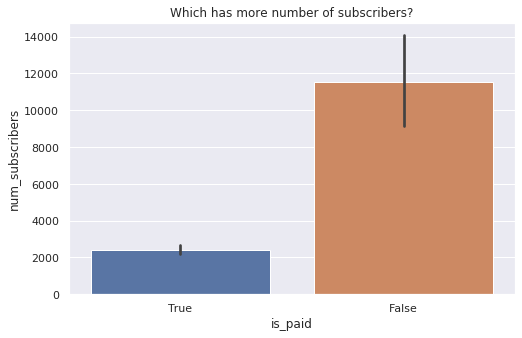

In [171]:
plt.figure(figsize=(8,5))
sns.barplot(x=df['is_paid'], y=df['num_subscribers'])
plt.title("Which has more number of subscribers?")
plt.show()

Well, it's pretty intuitive that free courses are more subscribed to.

## Que6: Which level of course is most subscribed to? 

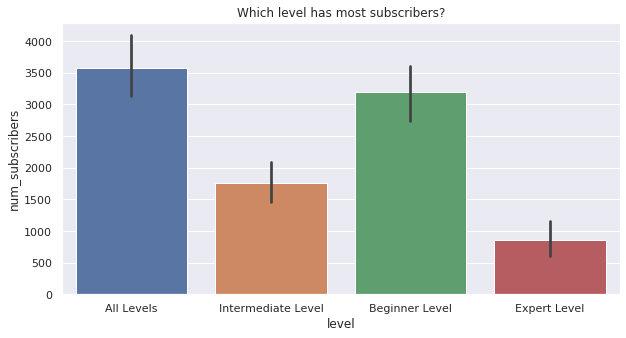

In [172]:
plt.figure(figsize=(10,5))
y=df['num_subscribers']
x=df['level']
sns.barplot(x,y)
plt.title("Which level has most subscribers?")
plt.show()

So, The courses which have all level acces, that means the most basic ones are most subscribed

## QUE7: Do paid course have more number of lectures?

In [173]:
df.groupby(['is_paid']).mean()

,price,num_subscribers,num_reviews,num_lectures
is_paid,,,,
False,0.000000,11533.951613,425.929032,21.416129
True,72.078885,2427.529953,131.286180,41.779656


**Yes!!** Paid courses have almost twice the number of lectures than free ones. P.s: More money More Knowledge! 😁

# III. Conclusion 

After performing basic data cleaning methods and Exploratory Data Analysis, we could answer a number of questions as mentioned above.  
So, Next time you purchase a MOOC on udemy, you can make a better decison. 
> Thank You! 